<font size="6" color="red">ch3. 분류분석</font>

# 1장. 분류분석 개요
- scikit-learn 공식 사이트 : http://scikit-learn.org
- scikit-learn 도큐먼트 : http://scikit-learn.org/stable/

```pip install scikit-learn```

## 1-1 tensorflow(DL)나 scikit-learn(ML) 샘플용 데이터 셋 접근 방법
### load 계열 (패키지 내에 데이터를 갖고 있음)
### fetch 계열 (패키지가 데이터를 갖고 있지 않고, 함수 호출 시 인터넷 다운)
### make 계열
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성

In [1]:
# load 계열 : 독립변수와 종속변수를 나눔
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # 흑백 손글씨 데이터(28x28)
X_train.shape, y_train.shape, X_test.shape, y_test.shape  # 7만개 데이터

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

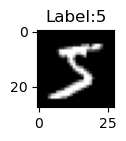

In [2]:
plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap='gray')  # 흑백데이터
plt.title(f'Label:{y_train[0]}')
plt.show()

In [4]:
# fetch 계열 : 독립변수와 종속변수를 나누지 않음
from sklearn.datasets import fetch_openml  # iris, mnist, wine, fashion-MNIST
import numpy as np
mnist = fetch_openml(name='mnist_784', parser='auto', version=1, as_frame=False)  # parser='auto', version=1 : warning 제거 / as_frame=False : 데이터프레임으로 생성X

In [6]:
X, y = mnist.data, mnist.target.astype(np.uint8)  # y=unsigned int(음수를 저장하지 않는 int)
X.shape, y.shape

((70000, 784), (70000,))

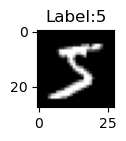

In [8]:
plt.figure(figsize=(1, 1))
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(f'Label:{y[0]}')
plt.show()

In [11]:
iris = fetch_openml(name='iris', parser='auto', version=1)
X, y = iris.data, iris.target
y[0]

'Iris-setosa'

# 2절. 분류분석의 종류(교안 p.8)
## 2-1 확률적 모형
- 주어진 데이터에 대해 각 클래스(종속변수 그룹)가 정답일 조건부 확률을 계산하는 모형
- 함수 : predict(test_X값), predict_proba()-각 분류 클래스별 확률, predict_log_proba()-확률의 로그값

### 1) 확률적 생성 모형
- 베이즈 정리를 사용한 확률적 생성 모형
```
ex) sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis(이차판별분석 모형)
    sklearn.naive_bayes.MultinomialNB(나이브 베이지안)
```

### 2) 확률적 판별 모형
- 조건부 확률 함수를 추정하는 확률적 판별 모형
```
ex) sklearn.linear_model.LogisticRegression(로지스틱 회귀분석)
    sklearn.tree.DecisionTreeClassifier(의사결정나무)
```

## 2-2 판별함수 모형
- 주어진 데이터를 클래스에 따라 서로 다른 영역으로 나누는 경계면을 찾은 후 이 경계면으로부터 주어진 데이터가 어느 위치에 있는지를 계산하는 판별함수를 이용하는 모형
- 함수 : predict(test_X값), decision_function(값)-어떤 클래스로 분류되는 정도
```
ex) sklearn.linear_model.Perceptron(퍼셉트론:단일신경망 모형)
    sklearn.svm.SVC(서포트 벡터 머신)
    sklearn.neural_network.MLPClassifier(다중신경망 모형)
```

=> RandomForest, XGBoost, LGBM, CatBoost 등의 앙상블 모형이 더 많이 사용됨

# 3절. 분류분석모형1_확률적 생성 모형
## 3-1 QDA(Quadratic Discriminant Analysis) : 이차판별분석법
- 독립변수 X가 실수이고 다변수 정규분포라고 가정 (교안 p.11-12)

In [12]:
# 샘플데이터 생성
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
from sklearn.datasets import make_classification
X, y = make_classification(# n_samples=100,  # 기본값:100
                           n_features=2,     # 독립변수 갯수
                           n_informative=2,  # 종속변수에 영향을 미치는 독립변수 갯수
                           n_redundant=0,    # 독립변수 중 독립변수끼리 선형관계가 있는 수
                           n_classes=2,      # 종속변수의 클래스 수(0,1)
                           n_clusters_per_class=1, # 클래스 당 군의 갯수
                           random_state=9)   # random seed 값
X.shape, y.shape

((100, 2), (100,))

In [14]:
import pandas as pd
import numpy as np
print(pd.Series(y).unique())
print(np.unique(y))

[0 1]
[0 1]


In [17]:
X0 = X[y == 0]  # 0인 그룹의 독립변수
X1 = X[y == 1]  # 1인 그룹의 독립변수

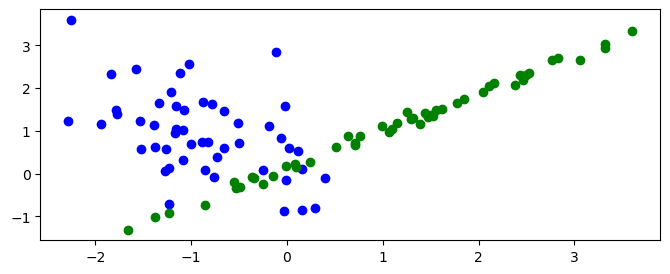

In [24]:
plt.figure(figsize=(8, 3))
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='g')
plt.show()

In [25]:
len(X0), len(X1)

(50, 50)

In [26]:
# 대칭구조 만들기
X[y == 1] = -X[y == 0]

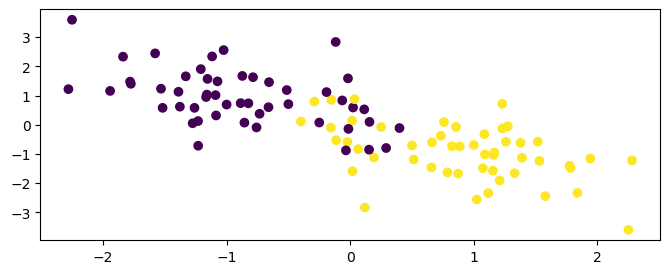

In [27]:
plt.figure(figsize=(8, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [28]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [32]:
x = [[0, 0]]
model.predict(x)

array([0])

In [33]:
model.predict_proba(x)  # 각 class별 조건부확률 [[0일확률, 1일확률]]

array([[0.5, 0.5]])

In [34]:
model.predict_log_proba(x)  # 확률의 로그값(음수) [[0일확률, 1일확률]]

array([[-0.69314718, -0.69314718]])

In [35]:
model.classes_  # 예측한 결과가 나뉘는 값

array([0, 1])

In [36]:
model.score(X, y)  # accuracy

0.88

In [37]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat, colnames=['예측값'], rownames=['실제값'])

예측값,0,1
실제값,,
0,44,6
1,6,44


[[0.5 0.5]]


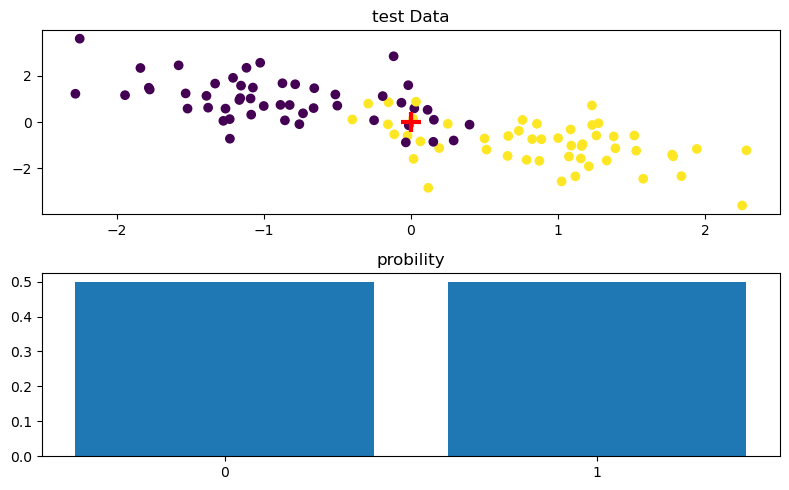

In [51]:
# 교안 p.13
plt.figure(figsize=(8, 5))
x = [[0, 0]]
p = model.predict_proba(x)  # [[0.5, 0.5]]
print(p)

plt.subplot(2, 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(x[0][0], x[0][1], c='r', marker='+', s=200, lw=3)
plt.title('test Data')

plt.subplot(2, 1, 2)
plt.bar(model.classes_, p[0])
plt.xticks(model.classes_)
plt.title('probility')
plt.tight_layout()
plt.show()

[[0.65698573 0.34301427]]


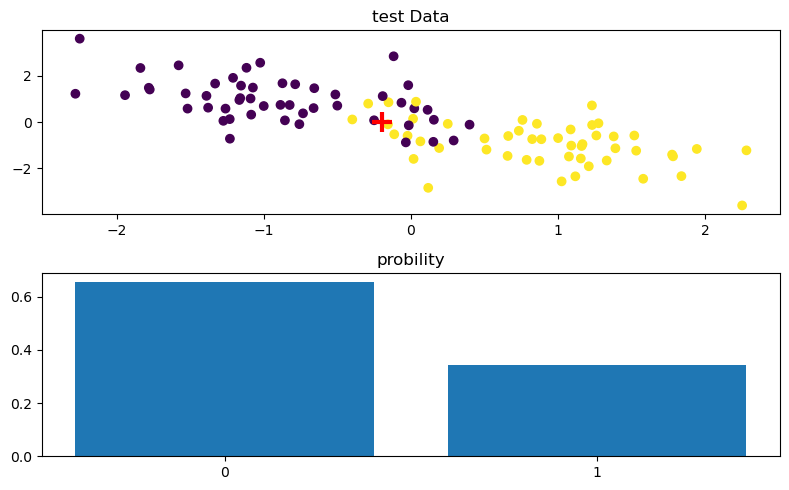

In [52]:
plt.figure(figsize=(8, 5))
x = [[-0.2, 0]]
p = model.predict_proba(x)  # [[0.65698573 0.34301427]]
print(p)

plt.subplot(2, 1, 1)  # 2행1열1번째
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(x[0][0], x[0][1], c='r', marker='+', s=200, lw=3)
plt.title('test Data')

plt.subplot(2, 1, 2)
plt.bar(model.classes_, p[0])
plt.xticks(model.classes_)
plt.title('probility')
plt.tight_layout()
plt.show()

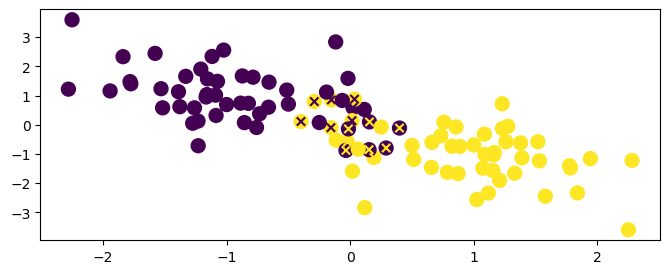

In [60]:
y_hat = model.predict(X)
plt.figure(figsize=(8, 3))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=100)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y_hat, marker='x')
plt.show()

## 3-2 나이브 베이지안 모형

In [66]:
# 데이터 준비
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.species

# 모형(모델) 만들기
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X.values, y)  # X.values:array로 변환
# model.fit(X, y)
print(X.shape, y.shape, type(X), type(y))

(150, 4) (150,) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [69]:
# 예측하기
test_X = [[5.1, 3.5, 1.4, 0.2]]  # X.loc[0] : setosa
print(model.predict(test_X))
print(model.classes_)
print(model.predict_proba(test_X))

['setosa']
['setosa' 'versicolor' 'virginica']
[[0.75199536 0.16092948 0.08707516]]


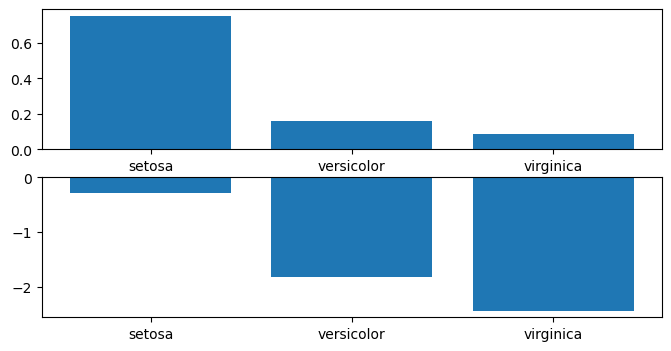

In [74]:
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.subplot(2, 1, 2)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.show()

# 4절. 분류분석모형2_확률적 판별 모형
## 4-1 로지스틱 회귀분석
- 종속변수가 이항분포(0, 1)를 따름

In [75]:
X, y = make_classification(n_samples=100,   # 기본값:100
                           n_features=1,    # 독립변수 수
                           n_redundant=0,   # 종속변수에 영향을 미치지 않는 독립변수 수
                           n_informative=1, # 종속변수에 영향을 미치는 독립변수 수
                           n_clusters_per_class=1, # class당 서브 클래스 수(1:없음)
                           n_classes=2,     # 회귀분석이므로 2이상이 될 수 없음
                           random_state=1)
X.shape, y.shape  # 2차원, 1차원

((100, 1), (100,))

In [77]:
np.unique(y), np.mean(y)

(array([0, 1]), 0.5)

In [78]:
# 모형(모델) 생성
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [84]:
xx = np.linspace(-3, 3, 100)  # -3~3까지 100개
print(xx.shape)      # 100행0열
# model.predict(xx)  # 에러:1차원이므로

# xx 값을 predict하기 위한 축 추가 : [[-3], [-2.93], ...]
XX = xx.reshape(-1, 1)  # 100행1열
XX = xx[:, np.newaxis]
XX = xx[:, None]
XX = np.expand_dims(xx, axis=1)
print('축 증가 결과 shape : ', XX.shape)

prob = model.predict_proba(XX)  # 각 변수의 0일 확률, 1일 확률

(100,)
축 증가 결과 shape :  (100, 1)


In [87]:
prob0 = prob[:, 0]  # 각 변수의 0일 확률
prob1 = prob[:, 1]  # 각 변수의 1일 확률

[0.73082662 0.26917338]


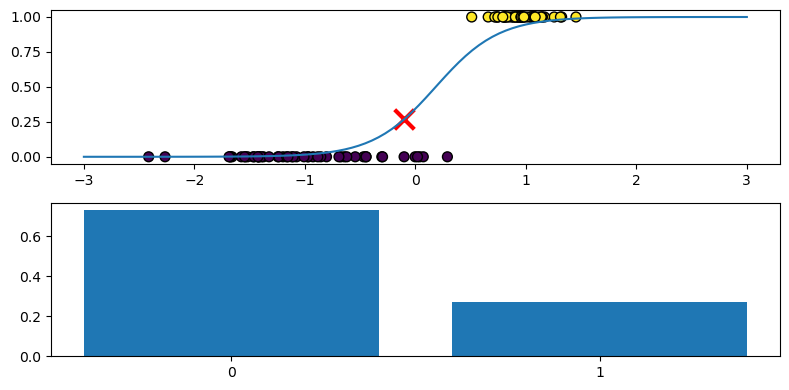

In [95]:
test_x = [[-0.1]]
prob_x = model.predict_proba(test_x)
print(prob_x[0])

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(xx, prob1)
plt.scatter(test_x[0], prob_x[0][1], c='r', marker='x', s=200, lw=3)  # 0일확률, 1일확률
plt.scatter(X, y, c=y, s=50, edgecolors='k')
plt.subplot(2, 1, 2)
plt.bar(model.classes_, prob_x[0])
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

## 4-2 의사결정나무
- 분류와 회귀에 모두 사용될 수 있으므로 CART(classification And Regression Tree)라고도 함
- ★ 종속변수에 영향을 주는 독립변수의 범주를 찾는데 목적이 있음

In [105]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]  # petal_length, petal_width
# y = iris.target     # 0, 1, 2
y = iris.target_names[iris.target]  # ['setosa', 'versicolor', 'virginica']
feature_names = [name[:-5] for name in iris.feature_names[2:]]

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', # 기본값 gini(빠른속도) / entropy(높은품질):분류품질기준
                                  max_depth=1,         # 깊이
                                  random_state=0)
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [108]:
test_X = [[1.4, 0.2]]  # X[0]
print('예측값 : ', dt_model.predict(test_X))
print('클래스별 확률값 : ', dt_model.predict_proba(test_X))

예측값 :  ['setosa']
클래스별 확률값 :  [[1. 0. 0.]]


In [118]:
# 분류 과정을 트리로 시각화 : 어떤 클래스에서 어떤 독립변수가 가장 큰 영향을 미치는지 탐색 가능
import io
# conda install graphviz (의사결정나무 그래프 생성 도구)
from sklearn.tree import export_graphviz
# pip install pydot (graphviz로 생성된 데이터를 이미지로 변환하는 도구)
import pydot
from IPython.core.display import Image

def draw_decision_tree(model, feature_names):
    # 메모리 버퍼 생성
    dot_buf = io.StringIO()
    # 모델을 트리로 시각화 (dot_buf 객체에 저장)
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    # dot_buf에 저장된 문자를 graph 객체로 생성 -> imgae 이미지로 변한
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]  # getvalue():문자열로 변환
    image = graph.create_png()
    return Image(image)

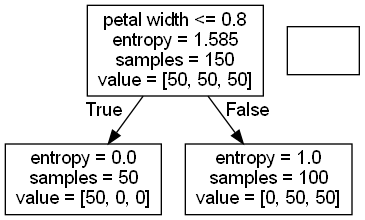

In [119]:
draw_decision_tree(dt_model, feature_names)

In [135]:
# plot_decision_regions 함수 적용을 위해 y값을 숫자로 설정
data = load_iris()
X = data.data[:, 2:]  # petal_length, petal_width
y = data.target       # 0, 1, 2
# y = iris.target_names[iris.target]  # ['setosa', 'versicolor', 'virginica']
feature_names = [name[:-5] for name in data.feature_names[2:]]
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [136]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

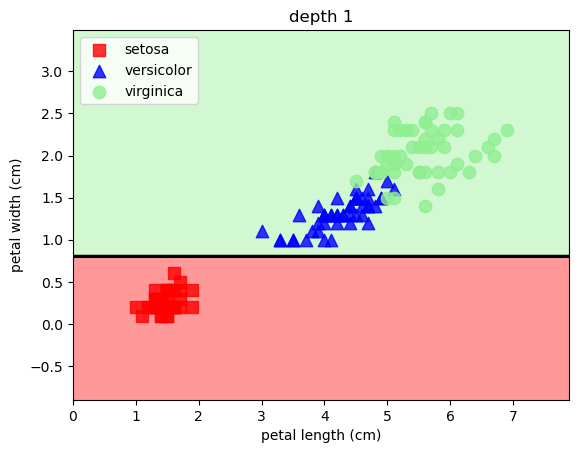

In [137]:
plot_decision_regions(X, y, dt_model, title='depth 1')
plt.show()

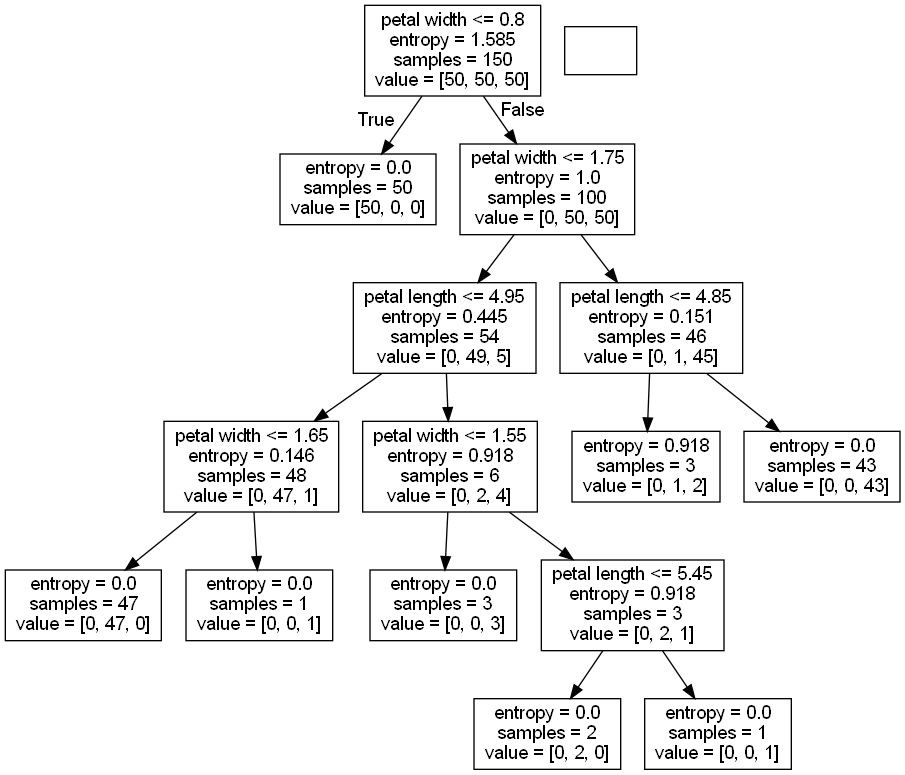

In [138]:
dt_model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)
draw_decision_tree(dt_model5, feature_names)

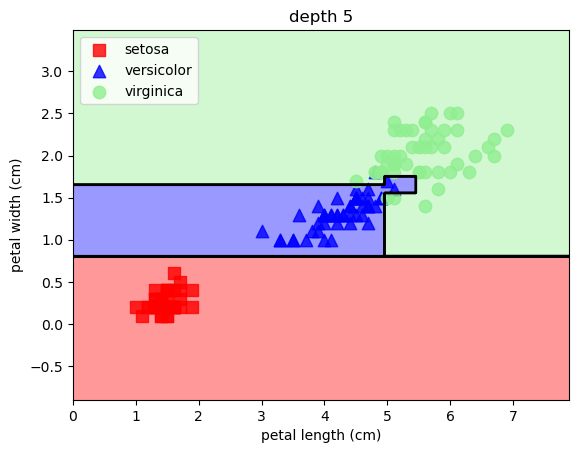

In [139]:
plot_decision_regions(X, y, dt_model5, title='depth 5')
plt.show()

# 5절. 분류분석모형3_판별함수 모형
- predict(), decision_function()
ex). Perceptron, SVM, MLP
## 5-1 Perceptron

In [144]:
iris = load_iris()
idx = (iris.target == 0) | (iris.target == 2)
idx = np.in1d(iris.target, [0, 2])  # setosa, virginica

In [145]:
X = iris.data[idx, 0:2]
y = iris.target[idx]
X.shape, y.shape

((100, 2), (100,))

In [146]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100,  # epoch
                   eta0=0.1,      # learning rate
                   random_state=1).fit(X, y)

In [148]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,2
실제값,,
0,49,1
2,0,50


In [150]:
(y != y_hat).sum()  # 예측값이 1개만 다름

1

In [156]:
for idx, (real, hat) in enumerate(zip(y, y_hat)):
    if real != hat:
        print(f'{idx}번째 실제값:{real}, 예측값:{hat} - 데이터{X[idx]}')

41번째 실제값:0, 예측값:2 - 데이터[4.5 2.3]


In [161]:
# 축 증가(열 axis=1) : .reshape(-1, 1)
# 축 증가(행 axis=0) : .reshape(1, -1)
# test_X = [[4.5, 2.3]]
test_X = X[41].reshape(1, -1)
test_X = X[41][np.newaxis, :]
test_X = X[41][None, :]
test_X = np.expand_dims(X[41], axis=0)
print('테스트 데이터 : ', test_X)
print('예측값 : ', model.predict(test_X))
print('decision : ', model.decision_function(test_X))
# 경계면(0)에서 1.24만큼 떨어짐
# 양수(+) : 2그룹 영역
# 음수(-) : 0그룹 영역

테스트 데이터 :  [[4.5 2.3]]
예측값 :  [2]
decision :  [1.24]


In [163]:
test_X = np.expand_dims(X[0], axis=0)
print('테스트 데이터 : ', test_X)
print('예측값 : ', model.predict(test_X))
print('decision : ', model.decision_function(test_X))

테스트 데이터 :  [[5.1 3.5]]
예측값 :  [0]
decision :  [-3.134]


In [164]:
test_X = np.expand_dims(X[99], axis=0)
print('테스트 데이터 : ', test_X)
print('예측값 : ', model.predict(test_X))
print('decision : ', model.decision_function(test_X))

테스트 데이터 :  [[5.9 3. ]]
예측값 :  [2]
decision :  [2.269]


## 5-2 SVM(Support Vector Machine)

In [165]:
from sklearn.svm import SVC
model = SVC().fit(X, y)

In [166]:
test_X = np.expand_dims(X[41], axis=0)
print('테스트 데이터 : ', test_X)
print('예측값 : ', model.predict(test_X))
print('decision : ', model.decision_function(test_X))

테스트 데이터 :  [[4.5 2.3]]
예측값 :  [0]
decision :  [-0.72539221]


In [167]:
test_X = np.expand_dims(X[99], axis=0)
print('테스트 데이터 : ', test_X)
print('예측값 : ', model.predict(test_X))
print('decision : ', model.decision_function(test_X))

테스트 데이터 :  [[5.9 3. ]]
예측값 :  [2]
decision :  [0.81675214]


## 5-3 다중퍼셉트론(인공신경망)

In [168]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500).fit(X, y)

In [169]:
pred = mlp_model.predict(X)
pd.crosstab(y, pred, colnames=['예측값'], rownames=['실제값'])

예측값,0,2
실제값,,
0,50,0
2,0,50


In [170]:
for idx, (real, hat) in enumerate(zip(y, pred)):
    if real != hat:
        print(f'{idx}번째 실제값:{real}, 예측값:{hat} - 데이터{X[idx]}')

In [171]:
mlp_model.predict_proba(X[41].reshape(1, -1))

array([[0.53532778, 0.46467222]])

In [173]:
mlp_model.score(X, y)

1.0

# 6절. 분류모형 성능평가
## 6-1 scikit-learn 모형 평가 방법
- 예측모형.score()
    * 분류의 경우 accuracy만 알 수 있음 / 회귀의 경우 r제곱(설명력)
- **metrics 패키지 함수**
    * 분류, 회귀, 군집 모형의 평가를 위한 다양한 함수 제공
- scoring 매개변수 및 GridSearchCV 클래스 이용

In [176]:
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2]  # 실제값
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 2]  # 예측값
pd.crosstab(y_true, y_pred, colnames=['예측값'], rownames=['실제값'], margins=True)

예측값,0,1,2,All
실제값,,,,
0,2,1,0,3
1,1,2,0,3
2,0,1,2,3
All,3,4,2,9


In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true, y_pred=y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

## 6-2 혼돈행렬을 이용한 평가 방법
- accuracy, recall(재현율|민감도), precision, specificity(특이도), f1 score, fbeta score, 위양성율

In [180]:
result = pd.read_csv('model_result.csv')  # 고객 id, 실제값, 예측값
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [181]:
result.isna().sum()

CUST_ID    0
y_true     0
y_pred     0
dtype: int64

In [182]:
confusion_matrix(result.y_true, result.y_pred)

array([[1613,   22],
       [  81,   77]], dtype=int64)

In [183]:
pd.crosstab(result.y_true, result.y_pred, colnames=['예측값'], rownames=['실제값'], margins=True)
# TN, FP
# FN, TP

예측값,0,1,All
실제값,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [184]:
# 정확도 (TN+TP) / (TN+FP+FN+TP) : 맞게 예측한 확률
from sklearn.metrics import accuracy_score
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [185]:
# 민감도 (TP) / (TP+FP) : Positive로 예측한 것 중 맞게 예측한 확률
# 민감도가 높으면 고객만족도 / 민감도가 낮으면 고객불만도
from sklearn.metrics import precision_score
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [186]:
# 재현율 (TP) / (FN+TP) : 실제 positive 중 맞게 예측한 확률
# 재현율이 낮으면 회사 cost 발생 / 재현율이 높으면 회사 cost 발생을 줄임
from sklearn.metrics import recall_score
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [187]:
# 특이도(specificity) : 실제 Negative 중 맞게 예측한 확률(反. 재현율)
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [188]:
# 위양성율(fallout, FPR) FP / (TN+FP)
1 - recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [189]:
# f1 score : recall과 precision의 조화평균
from sklearn.metrics import f1_score
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [193]:
# fbeta score의 beta=1 : f1 score
# fbeta score의 2>=beta>1 : recall의 가중치가 높게 조정된 f1 score
# fbeta score의 0<=beta<1 : precision의 가중치가 높게 조정된 f1 score
from sklearn.metrics import fbeta_score
print(fbeta_score(result.y_true, result.y_pred, beta=0.5))
print(fbeta_score(result.y_true, result.y_pred, beta=1))
print(fbeta_score(result.y_true, result.y_pred, beta=2))

0.6949458483754513
0.5992217898832685
0.5266757865937073


## 6-3 ROC 커브를 이용한 성능 비교

In [194]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, 
                           weights=[0.95, 0.05],  # 0이 95%, 1이 5%
                           random_state=5)
X.shape, y.shape

((1000, 20), (1000,))

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [196]:
model1 = LogisticRegression().fit(X, y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)

In [198]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)

In [199]:
pd.crosstab(y, pred1)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [200]:
pd.crosstab(y, pred2)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [202]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thr1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thr2 = roc_curve(y, model2.decision_function(X))

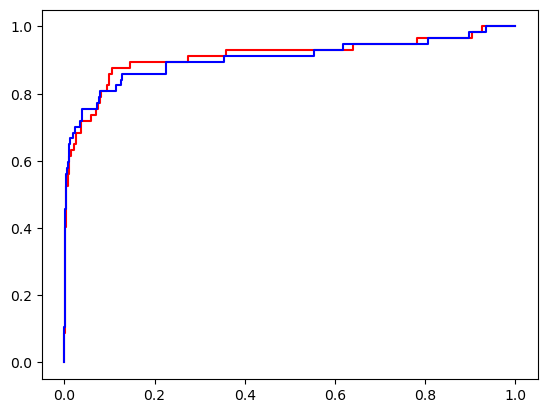

In [204]:
plt.plot(fpr1, tpr1, color='r')
plt.plot(fpr2, tpr2, color='b')
plt.show()

In [205]:
# AUC(Area Under Curve) : 위 그래프 곡선 밑 면적(넓을수록 좋음)
# AUC=1 : 완벽한 모델
# AUC=0.5 : 무작위 예측
# AUC<0.5 : 가장 좋지 않은 모델
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)  # model1이 더 좋음

(0.9112202563673234, 0.9037227214377407)